# Calculating photon-number moments of Gaussian states
Here we compare two different methods to calculate photon-number moments of Gaussian states, using automatic differentiation techniques and using hafnians.

In [1]:
from moments_torch import moments_torch, moments_torch_no_displacement

/home/nquesada/miniconda3/envs/moments/lib/python3.10/site-packages/torch/__init__.py:1145: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


In [2]:
from thewalrus.random import random_covariance

In [3]:
from thewalrus.quantum import photon_number_moment
import numpy as np

In [4]:
num_modes = 4

In [5]:
cov = random_covariance(num_modes)
means = np.random.rand(2*num_modes)
modes = {i:1 for i in range(num_modes)}

In [6]:
moments_torch(means/np.sqrt(2), cov)#, 

tensor(888287.5416)

In [7]:
photon_number_moment(means, cov, modes)

array(888287.5415859+9.09494702e-12j)

In [8]:
moments_torch_no_displacement(cov)

tensor(878588.4150)

In [9]:
photon_number_moment(0*means, cov, modes)

array(878588.41498053+3.63797881e-12j)

In [10]:
max_num_modes = 10
times_tw = []
times_tr = []
times_twnd = []
times_trnd = []
vals = list(range(2,max_num_modes))
for num_modes in vals:
    print(num_modes)    
    cov = random_covariance(num_modes)
    mu = np.random.rand(2*num_modes)
    modes = {i:1 for i in range(num_modes)} 
    ttw = %timeit -o photon_number_moment(np.zeros(len(cov)), cov, modes)
    ttr = %timeit -o moments_torch(mu, cov)
    ttwnd = %timeit -o photon_number_moment(mu, cov, modes)
    ttrnd = %timeit -o moments_torch_no_displacement(cov)
    times_tw.append(ttw.average)
    times_tr.append(ttr.average)
    times_twnd.append(ttwnd.average)
    times_trnd.append(ttrnd.average)


2
241 μs ± 4.76 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.04 ms ± 30.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
253 μs ± 7.22 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
660 μs ± 5.43 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3
438 μs ± 53.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.6 ms ± 173 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
470 μs ± 69.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.4 ms ± 23.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4
589 μs ± 224 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.25 ms ± 119 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
535 μs ± 69.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.39 ms ± 112 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5
552 μs ± 52.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
21.6 ms ± 1.04 ms per loop (mean ± std. dev. of 7 

In [11]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats=['svg']

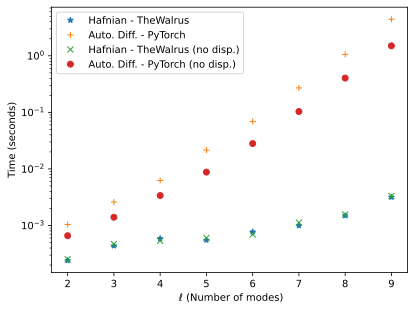

In [12]:
plt.semilogy(vals, times_tw, "*", label="Hafnian - TheWalrus")
plt.semilogy(vals, times_tr, "+", label="Auto. Diff. - PyTorch")
plt.semilogy(vals, times_twnd, "x", label="Hafnian - TheWalrus (no disp.)")
plt.semilogy(vals, times_trnd, "o", label="Auto. Diff. - PyTorch (no disp.)")
plt.legend()
plt.xlabel(r" $\ell$ (Number of modes)")
plt.ylabel("Time (seconds)")
plt.savefig("time_comparison.pdf",bbox_inches='tight')

In [13]:
import thewalrus, torch

In [14]:
torch.__version__

'2.5.0+cu124'

In [15]:
thewalrus.__version__

'0.22.0-dev'

In [16]:
!lscpu|head -18

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   39 bits physical, 48 bits virtual
CPU(s):                          8
On-line CPU(s) list:             0-7
Thread(s) per core:              2
Core(s) per socket:              4
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           140
Model name:                      11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz
Stepping:                        1
CPU MHz:                         2800.000
CPU max MHz:                     4700.0000
CPU min MHz:                     400.0000
